# 결정트리, 랜덤포레스트
- 펭귄 데이터 셋

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

SEED = 42

## 데이터 불러오기

In [2]:
#!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv

In [3]:
penguins = pd.read_csv('/content/penguins.csv')
print(penguins.shape)
penguins.head(5)

(344, 7)


,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = penguins.copy()

In [5]:
df.columns = [col.lower().replace(' ','_').replace('(','_').replace(')','') for col in df.columns]
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [6]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [9]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
df.duplicated().sum()

0

### 범주형 변수

In [11]:
col_category = df.select_dtypes(include=['object'])
col_category

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


In [12]:
col_category['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [13]:
col_category['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [14]:
col_category['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [15]:
col_category.loc[col_category['sex'] == '.','sex'] = 'FEMALE'
col_category['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

In [16]:
df.loc[df['sex'] == '.','sex'] = 'FEMALE'
df['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

In [17]:
df.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

### 연속형 변수

In [18]:
col_num = df.select_dtypes(include=['number'])
col_num.head(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0


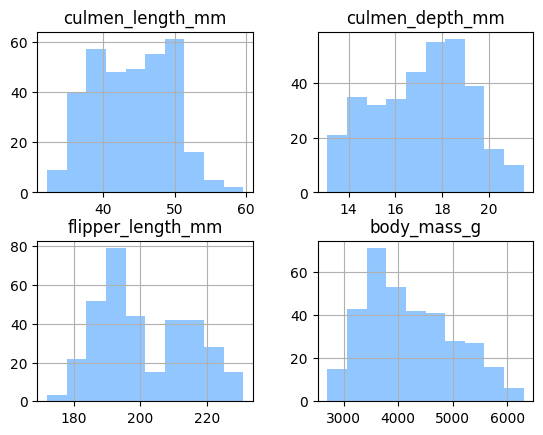

In [19]:
col_num.hist()
plt.show()

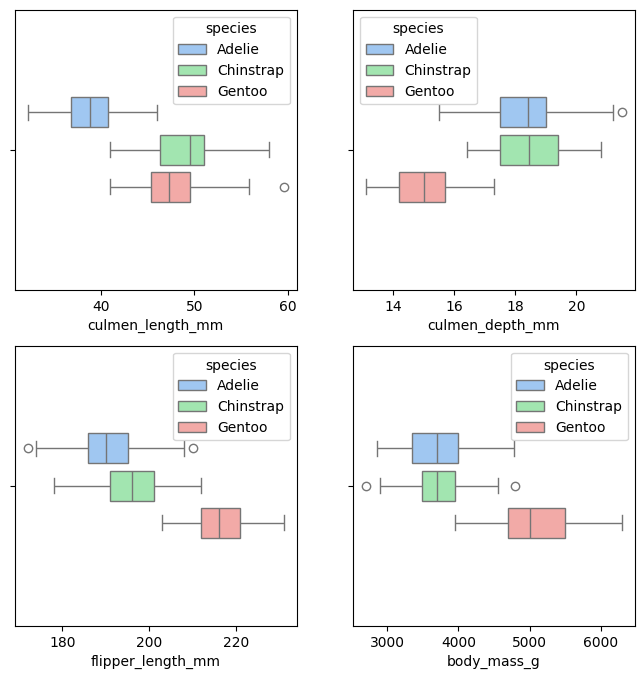

In [20]:
fig, axes = plt.subplots(2,2, figsize = (8,8))
axes = axes.flatten()
for i, col in enumerate(col_num.columns):
    sns.boxplot(x=col, data=df, hue='species', width=0.4, gap=0.2, ax=axes[i])
    axes[i].set_ylabel(None)
plt.show()

## 데이터 분리

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=SEED, stratify=df['species'])
print(train.shape,test.shape)

(275, 7) (69, 7)


### 결측치 처리

In [22]:
train.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

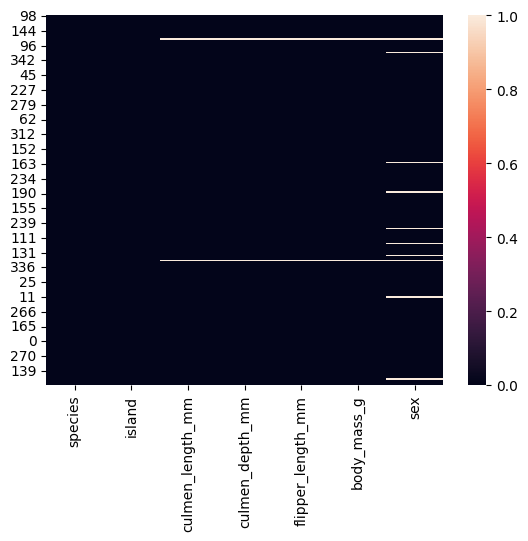

In [23]:
sns.heatmap(train.isna())
plt.show()

In [24]:
train = train.dropna()
train.shape

(265, 7)

### X, y 분리

In [25]:
X_train = train.drop(['species'], axis=1)
y_train = train['species']

X_train.shape, y_train.shape

((265, 6), (265,))

In [26]:
X_train.head(3)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,Dream,33.1,16.1,178.0,2900.0,FEMALE
114,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
118,Torgersen,35.7,17.0,189.0,3350.0,FEMALE


### 인코딩

In [27]:
from sklearn.preprocessing import LabelEncoder # 열 1개
from sklearn.preprocessing import OrdinalEncoder # 열 여러개

oe = OrdinalEncoder()
X_train[['island','sex']] = oe.fit_transform(X_train[['island','sex']])

In [28]:
X_train.head(3)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,1.0,33.1,16.1,178.0,2900.0,0.0
114,0.0,39.6,20.7,191.0,3900.0,0.0
118,2.0,35.7,17.0,189.0,3350.0,0.0


In [29]:
le = LabelEncoder()
y_train_e = le.fit_transform(y_train)

In [30]:
y_train_e

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

### 스케일링

In [31]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_train_s

array([[ 0.        , -1.31868132, -0.375     , -0.82608696, -0.92      ,
        -1.        ],
       [-1.        , -0.6043956 ,  1.0625    , -0.26086957, -0.12      ,
        -1.        ],
       [ 1.        , -1.03296703, -0.09375   , -0.34782609, -0.56      ,
        -1.        ],
       ...,
       [ 1.        , -0.25274725,  0.375     , -0.08695652,  0.16      ,
         0.        ],
       [ 1.        , -0.92307692,  0.46875   , -0.43478261, -0.2       ,
        -1.        ],
       [ 0.        ,  0.62637363,  0.53125   ,  0.56521739,  0.04      ,
         0.        ]])

## 학습

### 테스트 데이터 전처리

In [32]:
X_test = test.drop(['species'],axis=1)
y_test = test['species']

In [33]:
X_test[['island','sex']] = oe.transform(X_test[['island','sex']])
X_test_s = rs.transform(X_test)
X_test_s

array([[ 0.        , -0.3956044 ,  0.375     ,  0.17391304, -0.04      ,
         0.        ],
       [ 1.        , -0.61538462,  0.03125   , -0.47826087, -0.2       ,
        -1.        ],
       [-1.        ,  0.14285714, -0.71875   ,  0.82608696,  0.52      ,
        -1.        ],
       [-1.        ,  0.40659341, -0.34375   ,  1.08695652,  1.56      ,
         0.        ],
       [ 0.        ,  0.10989011,  0.28125   , -0.82608696, -0.64      ,
        -1.        ],
       [-1.        , -0.81318681, -0.40625   , -0.60869565, -0.78      ,
        -1.        ],
       [ 0.        ,  0.48351648,  0.53125   ,  0.13043478, -0.2       ,
         0.        ],
       [-1.        ,  0.62637363,  0.        ,  1.34782609,  1.24      ,
         0.        ],
       [ 0.        ,  0.14285714,  0.15625   , -0.26086957, -0.28      ,
        -1.        ],
       [ 0.        ,  0.37362637,  0.0625    , -0.26086957, -0.52      ,
         0.        ],
       [ 1.        , -1.15384615,  1.1875    ,  0.

In [34]:
y_test_e = le.transform(y_test)
y_test_e

array([0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 2])

In [35]:
print(X_train_s.shape,y_train_e.shape)
print(type(X_train_s), type(y_train_e))

(265, 6) (265,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [36]:
print(X_test_s.shape,y_test_e.shape)
print(type(X_test_s), type(y_test_e))

(69, 6) (69,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### 모델 평가 함수

In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy : ', accuracy_score(y_true, y_pred))
    print('recall : ', recall_score(y_true, y_pred, average=aver))
    print('precision : ', precision_score(y_true, y_pred, average=aver))
    print('f1 : ', f1_score(y_true, y_pred, average=aver))
    print('-----'*11)
    cfm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize = (3,3))
    s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False, cmap='Purples')
    s.set(xlabel='Predcition', ylabel='Actual')
    plt.show()

### 트리 알고리즘

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=SEED)
clf.fit(X_train_s, y_train_e)

DecisionTreeClassifier(max_depth=3, random_state=42)

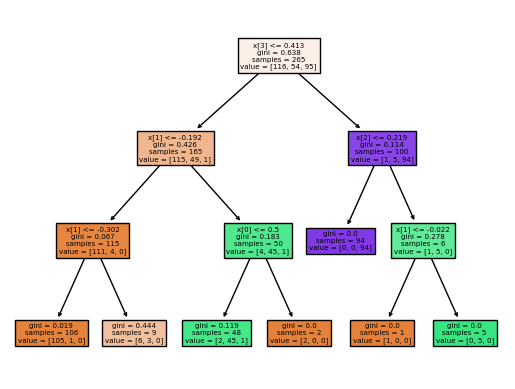

In [39]:
from sklearn.tree import plot_tree

plot_tree(clf, filled=True)
plt.show()

DecisionTreeClassifier
accuracy :  0.9710144927536232
recall :  0.9650793650793651
precision :  0.9760683760683762
f1 :  0.9700072621641249
-------------------------------------------------------


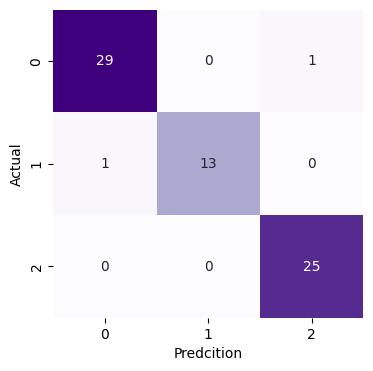

In [40]:
print('DecisionTreeClassifier')
print_metrics(y_test_e,clf.predict(X_test_s),'macro')

### 랜덤 포레스트

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf_r = RandomForestClassifier(n_estimators=100, random_state=SEED)
clf_r.fit(X_train_s, y_train_e)

RandomForestClassifier(random_state=42)

RandomForestClassifier
accuracy :  0.9855072463768116
recall :  0.9888888888888889
precision :  0.9777777777777779
f1 :  0.9828560296123126
-------------------------------------------------------


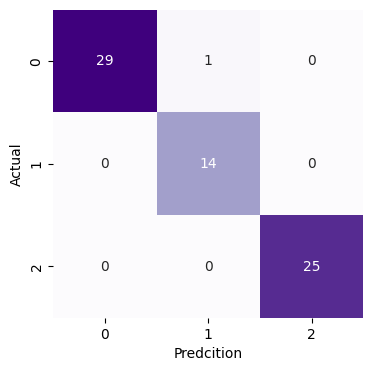

In [42]:
print('RandomForestClassifier')
print_metrics(y_test_e,clf_r.predict(X_test_s),'macro')

### SVM

In [43]:
from sklearn.svm import SVC

clf_s = SVC(random_state=SEED)
clf_s.fit(X_train_s,y_train_e)

SVC(random_state=42)

SVC
accuracy :  1.0
recall :  1.0
precision :  1.0
f1 :  1.0
-------------------------------------------------------


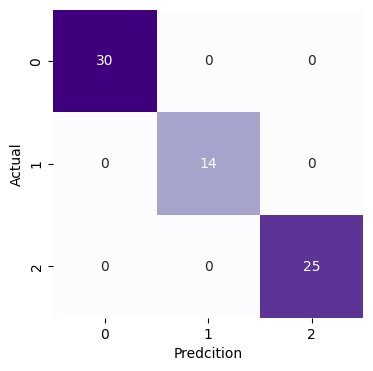

In [44]:
print('SVC')
print_metrics(y_test_e,clf_s.predict(X_test_s),'macro')